# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# pip install citipy

     |████████████████████████████████| 557 kB 3.4 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=8cbc4d104e645ea5238bf6718e3c9a799a62ebeca151d33d308374e6fed66416
  Stored in directory: /Users/jesse/Library/Caches/pip/wheels/72/ae/63/5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [70]:
weather_api_key

'f709c76754fe6df01c83dd940c7febae'

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [73]:
# Mini version of cities for testing and to limit API calls
citiesSample = []
i = 0
while i < 100:
  citiesSample.append(cities[i])
  i += 1

In [74]:
citiesSample

['stabat',
 'narsaq',
 'stans',
 'mataura',
 'port alfred',
 'kapaa',
 'taolanaro',
 'ushuaia',
 'saskylakh',
 'sitka',
 'hasaki',
 'rikitea',
 'bredasdorp',
 'atuona',
 'kaitangata',
 'krasnoselkup',
 'souillac',
 'college',
 'muros',
 'fortuna',
 'labuhan',
 'puerto ayora',
 'new norfolk',
 'belushya guba',
 'erenhot',
 'platanos',
 'fairbanks',
 'cape town',
 'sao filipe',
 'beringovskiy',
 'bluff',
 'jamestown',
 'teguise',
 'kahului',
 'albany',
 'east london',
 'ulladulla',
 'komsomolskiy',
 'vila franca do campo',
 'emilio carranza',
 'akyab',
 'lolua',
 'kemin',
 'saint-philippe',
 'portland',
 'skibbereen',
 'salinopolis',
 'touros',
 'buriti dos lopes',
 'vaini',
 'dikson',
 'russell',
 'zhangye',
 'bilma',
 'raton',
 'klaksvik',
 'otjiwarongo',
 'cherskiy',
 'khatanga',
 'mar del plata',
 'tondano',
 'hermanus',
 'nikolskoye',
 'ixtapa',
 'grand river south east',
 'puerto carreno',
 'tautira',
 'ahipara',
 'verkhnyaya inta',
 'homer',
 'wajima',
 'mirnyy',
 'san antonio',
 

In [77]:
# create dict object to hold lists
weather_dict = {
    'City' : [],
    'Lat' : [],
    'Lng' : [],
    'Max Temp' : [],
    'Humidity' : [],
    'Cloudiness' : [],
    'Wind Speed' : [],
    'Country' : [],
    'Date' : []
}
responses = []
page = 1
record = 1
# print
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    responses.append(response)
    if response['cod'] == 200:
        # add city name to result 
        weather_dict['City'].append(city)
        weather_dict['Lat'].append(response['coord']['lat'])
        weather_dict['Lng'].append(response['coord']['lat'])
        weather_dict['Max Temp'].append(response['main']['temp_max'])
        weather_dict['Humidity'].append(response['main']['humidity'])
        weather_dict['Cloudiness'].append(response['clouds']['all'])
        weather_dict['Wind Speed'].append(response['wind']['speed'])
        weather_dict['Country'].append(response['sys']['country'])
        weather_dict['Date'].append(response['dt'])
        print(f'Processing Record {record} of Set {page} | {city}')
    else:
        print(f'City not found, Skipppp!')

    record = record + 1
    if record % 50 == 0:
        page = page + 1
        record = 1  
    time.sleep(1)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stabat
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | stans
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | kapaa
City not found, Skipppp!
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | krasnoselkup
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | muros
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | labuhan
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | new norfolk
City not found, Skipppp!
Pro

Processing Record 11 of Set 5 | caxito
Processing Record 12 of Set 5 | makasar
City not found, Skipppp!
Processing Record 14 of Set 5 | hilo
Processing Record 15 of Set 5 | birin
Processing Record 16 of Set 5 | toro
Processing Record 17 of Set 5 | sayyan
City not found, Skipppp!
Processing Record 19 of Set 5 | nome
Processing Record 20 of Set 5 | wajir
Processing Record 21 of Set 5 | bridlington
Processing Record 22 of Set 5 | nouadhibou
Processing Record 23 of Set 5 | bela
Processing Record 24 of Set 5 | istok
Processing Record 25 of Set 5 | svencionys
Processing Record 26 of Set 5 | grindavik
Processing Record 27 of Set 5 | avallon
City not found, Skipppp!
Processing Record 29 of Set 5 | xihe
Processing Record 30 of Set 5 | ligayan
Processing Record 31 of Set 5 | ancud
Processing Record 32 of Set 5 | ola
Processing Record 33 of Set 5 | carrollton
Processing Record 34 of Set 5 | koppang
Processing Record 35 of Set 5 | stykkisholmur
Processing Record 36 of Set 5 | jalu
Processing Recor

Processing Record 22 of Set 9 | lhokseumawe
Processing Record 23 of Set 9 | nsanje
Processing Record 24 of Set 9 | luang prabang
Processing Record 25 of Set 9 | port moresby
Processing Record 26 of Set 9 | mahon
Processing Record 27 of Set 9 | saint george
Processing Record 28 of Set 9 | panguipulli
Processing Record 29 of Set 9 | garwa
Processing Record 30 of Set 9 | las palmas
Processing Record 31 of Set 9 | kenai
City not found, Skipppp!
Processing Record 33 of Set 9 | conceicao do araguaia
Processing Record 34 of Set 9 | hokitika
Processing Record 35 of Set 9 | ewa beach
Processing Record 36 of Set 9 | high level
Processing Record 37 of Set 9 | puerto escondido
City not found, Skipppp!
Processing Record 39 of Set 9 | gamba
Processing Record 40 of Set 9 | avarua
Processing Record 41 of Set 9 | ajdabiya
Processing Record 42 of Set 9 | poum
Processing Record 43 of Set 9 | opuwo
City not found, Skipppp!
Processing Record 45 of Set 9 | cestas
Processing Record 46 of Set 9 | stokmarknes


In [78]:
weather_dict

{'City': ['stabat',
  'narsaq',
  'stans',
  'mataura',
  'port alfred',
  'kapaa',
  'ushuaia',
  'saskylakh',
  'sitka',
  'hasaki',
  'rikitea',
  'bredasdorp',
  'atuona',
  'kaitangata',
  'krasnoselkup',
  'souillac',
  'college',
  'muros',
  'fortuna',
  'labuhan',
  'puerto ayora',
  'new norfolk',
  'erenhot',
  'platanos',
  'fairbanks',
  'cape town',
  'sao filipe',
  'beringovskiy',
  'bluff',
  'jamestown',
  'teguise',
  'kahului',
  'albany',
  'east london',
  'ulladulla',
  'komsomolskiy',
  'vila franca do campo',
  'emilio carranza',
  'akyab',
  'kemin',
  'saint-philippe',
  'portland',
  'skibbereen',
  'salinopolis',
  'touros',
  'buriti dos lopes',
  'vaini',
  'dikson',
  'russell',
  'zhangye',
  'bilma',
  'raton',
  'klaksvik',
  'otjiwarongo',
  'cherskiy',
  'khatanga',
  'mar del plata',
  'tondano',
  'hermanus',
  'nikolskoye',
  'ixtapa',
  'puerto carreno',
  'tautira',
  'ahipara',
  'verkhnyaya inta',
  'homer',
  'wajima',
  'mirnyy',
  'san ant

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('../output_data/citiesJesse.csv')
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stabat,3.7610,3.7610,26.11,85,99,1.13,ID,1650938942
1,narsaq,60.9167,60.9167,3.12,90,98,0.68,GL,1650938943
2,stans,46.9585,46.9585,7.94,94,75,0.51,CH,1650938945
3,mataura,-46.1927,-46.1927,11.38,72,67,4.10,NZ,1650938946
4,port alfred,-33.5906,-33.5906,14.10,81,5,5.20,ZA,1650938948
...,...,...,...,...,...,...,...,...,...
560,lorengau,-2.0226,-2.0226,28.66,74,14,3.73,PG,1650939763
561,vuktyl,63.8567,63.8567,1.70,87,100,2.97,RU,1650939764
562,marsa matruh,31.3525,31.3525,17.25,75,100,2.51,EG,1650939765
563,aykhal,66.0000,66.0000,-5.87,82,69,1.90,RU,1650939767


In [80]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.348650,20.348650,16.063416,71.297345,61.297345,3.398035,1.650939e+09
std,33.176233,33.176233,11.347983,21.746934,40.301612,2.520157,2.609945e+02
min,-54.800000,-54.800000,-25.370000,1.000000,0.000000,0.000000,1.650938e+09
25%,-6.216700,-6.216700,7.550000,63.000000,18.000000,1.630000,1.650939e+09
50%,22.690600,22.690600,18.580000,75.000000,75.000000,2.740000,1.650939e+09
75%,48.196700,48.196700,25.450000,87.000000,100.000000,4.470000,1.650940e+09
max,78.218600,78.218600,34.190000,100.000000,100.000000,14.190000,1.650940e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [81]:
# filter rows with humidity <= 100
weather_df_filtered = weather_df[weather_df['Humidity'] <= 100]
weather_df_humidity_high = weather_df[weather_df['Humidity'] > 100]
weather_df_filtered

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stabat,3.7610,3.7610,26.11,85,99,1.13,ID,1650938942
1,narsaq,60.9167,60.9167,3.12,90,98,0.68,GL,1650938943
2,stans,46.9585,46.9585,7.94,94,75,0.51,CH,1650938945
3,mataura,-46.1927,-46.1927,11.38,72,67,4.10,NZ,1650938946
4,port alfred,-33.5906,-33.5906,14.10,81,5,5.20,ZA,1650938948
...,...,...,...,...,...,...,...,...,...
560,lorengau,-2.0226,-2.0226,28.66,74,14,3.73,PG,1650939763
561,vuktyl,63.8567,63.8567,1.70,87,100,2.97,RU,1650939764
562,marsa matruh,31.3525,31.3525,17.25,75,100,2.51,EG,1650939765
563,aykhal,66.0000,66.0000,-5.87,82,69,1.90,RU,1650939767


In [82]:
# redescribe filtered data
weather_df_filtered.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.348650,20.348650,16.063416,71.297345,61.297345,3.398035,1.650939e+09
std,33.176233,33.176233,11.347983,21.746934,40.301612,2.520157,2.609945e+02
min,-54.800000,-54.800000,-25.370000,1.000000,0.000000,0.000000,1.650938e+09
25%,-6.216700,-6.216700,7.550000,63.000000,18.000000,1.630000,1.650939e+09
50%,22.690600,22.690600,18.580000,75.000000,75.000000,2.740000,1.650939e+09
75%,48.196700,48.196700,25.450000,87.000000,100.000000,4.470000,1.650940e+09
max,78.218600,78.218600,34.190000,100.000000,100.000000,14.190000,1.650940e+09


In [85]:
#  Get the indices of cities that have humidity over 100%.
weather_df_humidity_high.index

Int64Index([], dtype='int64')

In [88]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(weather_df[weather_df['Humidity'] > 100].index, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stabat,3.7610,3.7610,26.11,85,99,1.13,ID,1650938942
1,narsaq,60.9167,60.9167,3.12,90,98,0.68,GL,1650938943
2,stans,46.9585,46.9585,7.94,94,75,0.51,CH,1650938945
3,mataura,-46.1927,-46.1927,11.38,72,67,4.10,NZ,1650938946
4,port alfred,-33.5906,-33.5906,14.10,81,5,5.20,ZA,1650938948
...,...,...,...,...,...,...,...,...,...
560,lorengau,-2.0226,-2.0226,28.66,74,14,3.73,PG,1650939763
561,vuktyl,63.8567,63.8567,1.70,87,100,2.97,RU,1650939764
562,marsa matruh,31.3525,31.3525,17.25,75,100,2.51,EG,1650939765
563,aykhal,66.0000,66.0000,-5.87,82,69,1.90,RU,1650939767


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

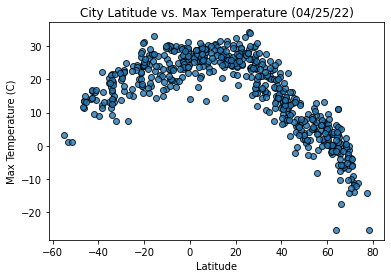

In [90]:
# scatter plot
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# make pretty
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Humidity Plot

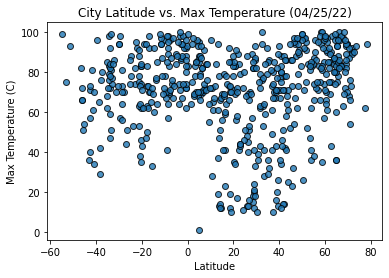

In [91]:
# scatter plot
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# make pretty
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Cloudiness Plot

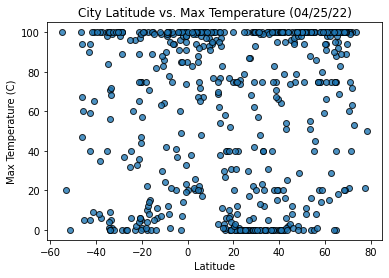

In [92]:
# scatter plot
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# make pretty
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show()

## Latitude vs. Wind Speed Plot

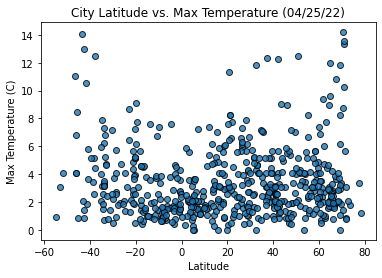

In [93]:
# scatter plot
plt.scatter(clean_city_data["Lat"], 
            clean_city_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# make pretty
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


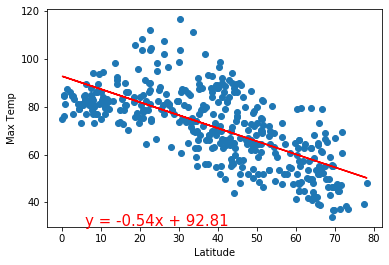

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


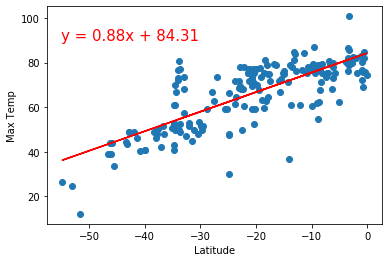

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


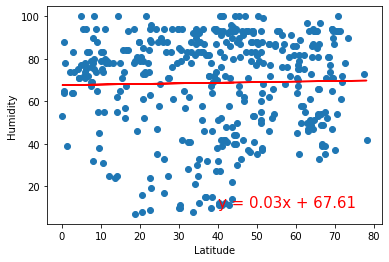

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


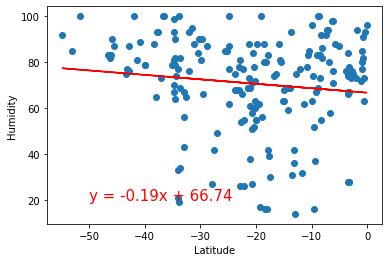

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


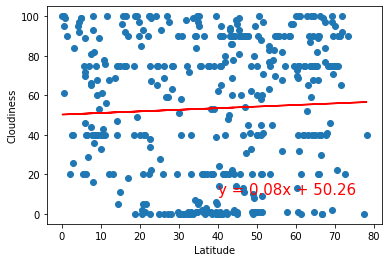

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


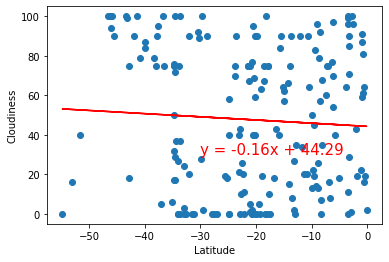

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


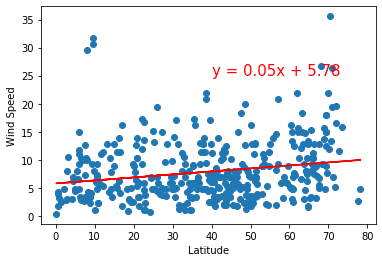

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


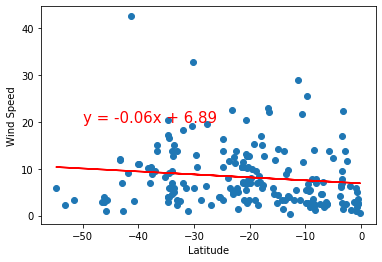